# Potting a diagonal correlation matrix

- 상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다.  

- 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.  
  
  
  
- 상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다.

- 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.


    r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,  
    r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,  
    r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,  
    r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,  
    r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,  
    r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,  
    r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
%matplotlib inline

In [9]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))
d.head(2)
#re.normal = 정규분포

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707


In [11]:
# Compute the correlation matrix
corr = d.corr()
corr.head(5)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
A,1.000000,-0.107401,-0.086468,0.000131,0.035047,0.004749,0.028226,0.000422,0.132100,0.057720,...,0.073645,-0.055396,-0.058241,-0.123823,0.096451,-0.015178,0.172725,0.003791,0.005531,-0.011534
B,-0.107401,1.000000,0.254632,0.061506,0.043581,-0.078019,0.069133,-0.211278,-0.011796,0.085277,...,0.031315,0.100451,-0.103068,0.011187,-0.008536,-0.030730,-0.022978,-0.050483,-0.014468,0.078737
C,-0.086468,0.254632,1.000000,-0.033682,-0.127464,0.141223,0.164793,-0.188574,-0.230059,0.145777,...,0.010497,0.051872,0.084793,0.167976,-0.043806,-0.057125,0.125580,-0.068426,-0.052764,0.094661
D,0.000131,0.061506,-0.033682,1.000000,0.086054,-0.153212,-0.000963,-0.017282,-0.109283,0.011056,...,-0.136959,-0.061816,0.134112,0.081143,0.124706,0.194911,-0.016944,-0.116963,0.054315,0.014383
E,0.035047,0.043581,-0.127464,0.086054,1.000000,-0.007159,0.157224,-0.096254,0.043785,0.015117,...,0.090499,0.041276,0.076138,0.027021,0.069976,-0.021745,0.104822,-0.047913,0.120465,0.080980


In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True
mask[:,2]

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [14]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

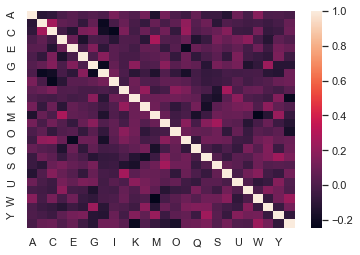

In [15]:
sns.heatmap(corr)

<AxesSubplot:>

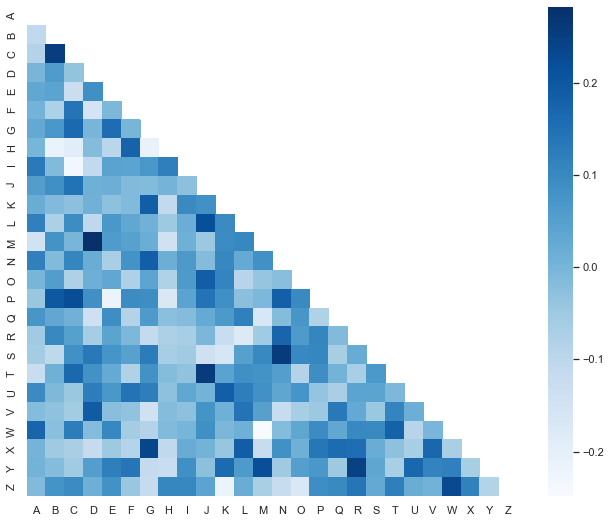

In [18]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap="Blues") # 반만 그리기

<AxesSubplot:>

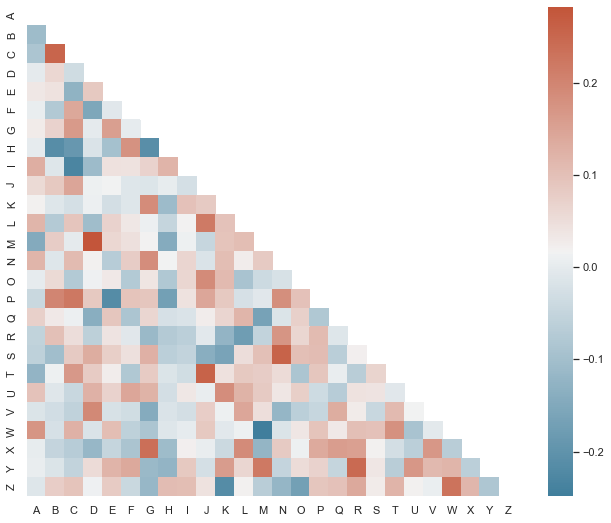

In [22]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap) # 반만 그리기

<AxesSubplot:>

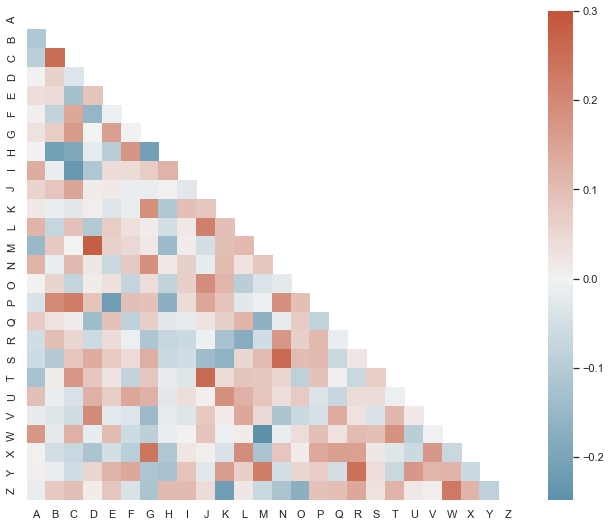

In [30]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=.3)
#최대치 0.3으로 출력

<AxesSubplot:>

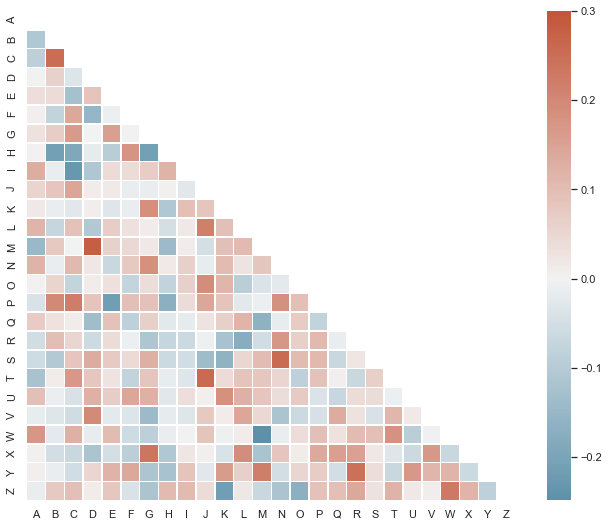

In [31]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=.3, square=True, linewidths=.5)
# 모양 선명하게 출력하기

<AxesSubplot:>

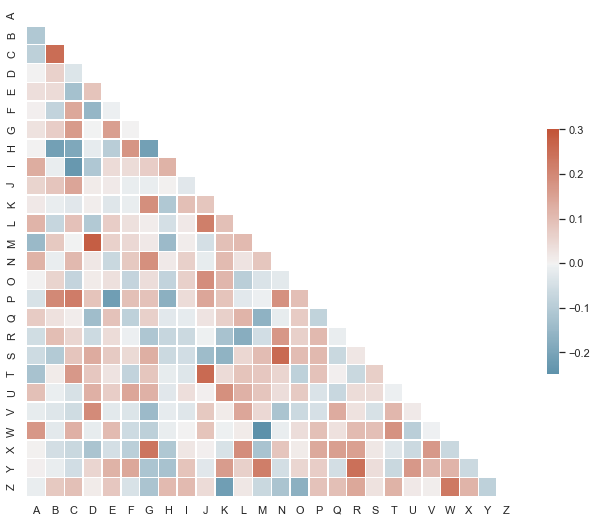

In [34]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink":.5})
# 범례줄여서 표시하기

<AxesSubplot:>

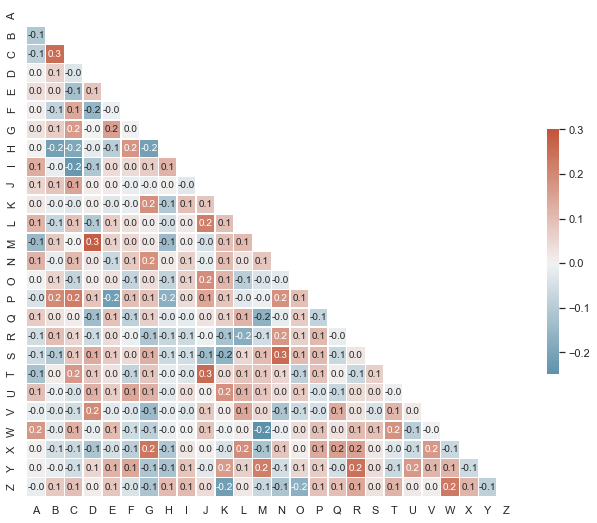

In [43]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=.3, square=True,annot=True,
            fmt='.1f',
            linewidths=.5, cbar_kws={"shrink":.5})
# 숫자값 표시하기 # 소수점 한자리만 표시하기.

In [44]:
mpg = sns.load_dataset("mpg")
mpg.head() # 예시 데이터

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [45]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [47]:
c= mpg.corr()
c

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [52]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(c, dtype=bool))
mask[np.triu_indices_from(mask)] = True
mask[:,2]

# sns.heatmap(c, cmap=cmap, mask=mask)

array([ True,  True,  True, False, False, False, False])

<AxesSubplot:>

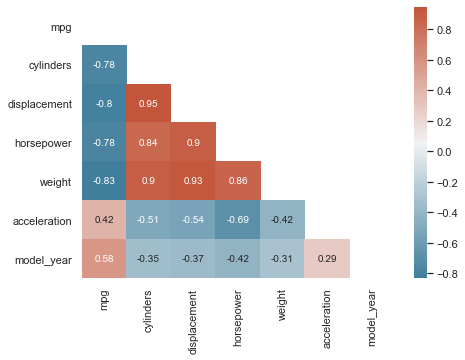

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(c, cmap=cmap, mask=mask, annot=True)

<AxesSubplot:>

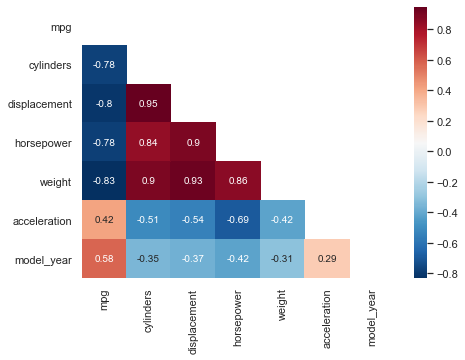

In [60]:
plt.figure(figsize=(7,5))
sns.heatmap(c, cmap='RdBu_r', mask=mask, annot=True)